In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
fatal_shootings = pd.read_csv('fatal-police-shootings-data.csv')
fatal_shootings

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


In [14]:
race_illness_pivot = fatal_shootings.pivot_table(values = 'id', index = 'race', columns = 'signs_of_mental_illness', aggfunc = np.count_nonzero)
race_illness_pivot

signs_of_mental_illness,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


In [10]:
races = sorted(([race for race in fatal_shootings['race'].unique() if isinstance(race, str)]))

values = []
for race in races:
    values.append((race_illness_pivot.loc[race][1]/(race_illness_pivot.loc[race][0]+ race_illness_pivot.loc[race][1])).round(2))

race_illness_pivot['fraction with mental illness'] = values
race_illness_pivot

signs_of_mental_illness,False,True,fraction with mental illness
race,,,
A,69,24,0.26
B,1114,184,0.14
H,745,157,0.17
N,64,14,0.18
O,37,11,0.23
W,1763,713,0.29


In [11]:
race_illness_pivot.sort_values(by='fraction with mental illness', ascending=False)

signs_of_mental_illness,False,True,fraction with mental illness
race,,,
W,1763,713,0.29
A,69,24,0.26
O,37,11,0.23
N,64,14,0.18
H,745,157,0.17
B,1114,184,0.14


Conclusion: It can be observed that for all the listed incidents, among race 'W' there is a highest fraction of observed signs of mental illness. It is about double comparing to race 'B', where this fraction is 0.14 (14%). It can be further investigated if race 'W' is in general more prone to mental illness, or if there are other factors underlying this difference.

In [12]:
fatal_shootings['date'] = pd.to_datetime(fatal_shootings['date'])
fatal_shootings['week_day'] = fatal_shootings['date'].dt.day_name()

In [13]:
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
shooting_weekday = fatal_shootings['week_day'].value_counts().reindex(days)
shooting_weekday

Monday       726
Tuesday      816
Wednesday    829
Thursday     810
Friday       761
Saturday     721
Sunday       753
Name: week_day, dtype: int64

<AxesSubplot:>

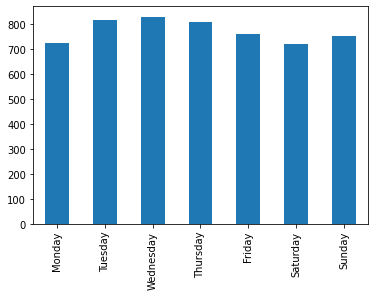

In [14]:
shooting_weekday.plot(kind = 'bar')

Conclusion: Judging from the above graph it seems that most fatal shootings happen on Tuesday, Wednesday and Thursday, while Monday and Saturday seem to be the safest days of the week.

In [15]:
population = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header = 0)[0]
population

,"Rank in states & territories, 2019","Rank in states & territories, 2010",State,"Population estimate, July 1, 2019[2]","Census population, April 1, 2010[3]","Percent change, 2010–2019[note 1]","Absolute change, 2010-2019","Total seats in the U.S. House of Representatives, 2013–2023","Estimated population per electoral vote, 2019[note 2]","Estimated population per House seat, 2019","Census population per House seat, 2010","Percent of the total U.S. population, 2018[note 3]"
0,1.0,1.0,California,39512223,37254523,6.1%,+2257700,53,718404,745514,702885,11.96%
1,2.0,2.0,Texas,28995881,25145561,15.3%,+3850320,36,763050,805441,698503,8.68%
2,3.0,4.0,Florida,21477737,18801310,14.2%,+2676427,27,740611,795472,696468,6.44%
3,4.0,3.0,New York,19453561,19378102,0.4%,+75459,27,670812,720502,717707,5.91%
4,5.0,6.0,Pennsylvania,12801989,12702379,0.8%,+99610,18,640099,711222,705715,3.87%
5,6.0,5.0,Illinois,12671821,12830632,-1.2%,"−158,811",18,633591,703990,712864,3.85%
6,7.0,7.0,Ohio,11689100,11536504,1.3%,+152596,16,649394,730569,721032,3.53%
7,8.0,9.0,Georgia,10617423,9687653,9.6%,+929770,14,663589,758387,691975,3.18%
8,9.0,10.0,North Carolina,10488084,9535483,10.0%,+952601,13,699206,806776,733498,3.14%
9,10.0,8.0,Michigan,9986857,9883640,1.0%,+103217,14,624179,713347,705974,3.02%


In [16]:
states_abbr = pd.read_html('https://www.ssa.gov/international/coc-docs/states.html')[0]
states_abbr

,0,1
0,ALABAMA,AL
1,ALASKA,AK
2,AMERICAN SAMOA,AS
3,ARIZONA,AZ
4,ARKANSAS,AR
5,CALIFORNIA,CA
6,COLORADO,CO
7,CONNECTICUT,CT
8,DELAWARE,DE
9,DISTRICT OF COLUMBIA,DC


In [17]:
states_names_abbr = dict(zip(states_abbr[1], states_abbr[0].str.title()))
states_names_abbr

{'AL': 'Alabama',
 'AK': 'Alaska',
 'AS': 'American Samoa',
 'AZ': 'Arizona',
 'AR': 'Arkansas',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DE': 'Delaware',
 'DC': 'District Of Columbia',
 'FL': 'Florida',
 'GA': 'Georgia',
 'GU': 'Guam',
 'HI': 'Hawaii',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'IA': 'Iowa',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'ME': 'Maine',
 'MD': 'Maryland',
 'MA': 'Massachusetts',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MS': 'Mississippi',
 'MO': 'Missouri',
 'MT': 'Montana',
 'NE': 'Nebraska',
 'NV': 'Nevada',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NY': 'New York',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'MP': 'Northern Mariana Is',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'PR': 'Puerto Rico',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VT': 'Vermont',
 'VA': 

In [18]:
fatal_shootings['state_name'] = fatal_shootings['state'].map(states_names_abbr)
fatal_shootings

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,week_day,state_name
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday,Washington
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday,Oregon
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday,Kansas
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday,California
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday,Colorado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False,Saturday,Missouri
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False,Saturday,California
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False,Monday,Kansas
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False,Tuesday,Illinois


In [19]:
state_population = dict(zip(population['State'], population['Population estimate, July 1, 2019[2]']))
state_population

{'California': 39512223,
 'Texas': 28995881,
 'Florida': 21477737,
 'New York': 19453561,
 'Pennsylvania': 12801989,
 'Illinois': 12671821,
 'Ohio': 11689100,
 'Georgia': 10617423,
 'North Carolina': 10488084,
 'Michigan': 9986857,
 'New Jersey': 8882190,
 'Virginia': 8535519,
 'Washington': 7614893,
 'Arizona': 7278717,
 'Massachusetts': 6949503,
 'Tennessee': 6833174,
 'Indiana': 6732219,
 'Missouri': 6137428,
 'Maryland': 6045680,
 'Wisconsin': 5822434,
 'Colorado': 5758736,
 'Minnesota': 5639632,
 'South Carolina': 5148714,
 'Alabama': 4903185,
 'Louisiana': 4648794,
 'Kentucky': 4467673,
 'Oregon': 4217737,
 'Oklahoma': 3956971,
 'Connecticut': 3565287,
 'Utah': 3205958,
 'Puerto Rico': 3193694,
 'Iowa': 3155070,
 'Nevada': 3080156,
 'Arkansas': 3017825,
 'Mississippi': 2976149,
 'Kansas': 2913314,
 'New Mexico': 2096829,
 'Nebraska': 1934408,
 'Idaho': 1787065,
 'West Virginia': 1792147,
 'Hawaii': 1415872,
 'New Hampshire': 1359711,
 'Maine': 1344212,
 'Montana': 1068778,
 'Rhod

In [28]:
shootings_per_state = fatal_shootings.groupby(pd.Grouper(key = 'state_name')).agg({'id': 'count'})
shootings_per_state.reset_index()
shootings_per_state['state_name'] = shootings_per_state.index
shootings_per_state['population'] = shootings_per_state['state_name'].map(state_population)

def incidents_per_1000(row):
    result = round((row['id']/row['population'])*1000, 4)
    return result

shootings_per_state['incidents/1000 citizens'] = shootings_per_state.apply(lambda row: incidents_per_1000(row), axis=1)

shootings_per_state.sort_values(by = 'incidents/1000 citizens', ascending = False)

,id,state_name,population,incidents/1000 citizens
state_name,,,,
Alaska,39,Alaska,731545.0,0.0533
New Mexico,106,New Mexico,2096829.0,0.0506
Oklahoma,164,Oklahoma,3956971.0,0.0414
Arizona,254,Arizona,7278717.0,0.0349
Colorado,195,Colorado,5758736.0,0.0339
Nevada,96,Nevada,3080156.0,0.0312
West Virginia,54,West Virginia,1792147.0,0.0301
Montana,31,Montana,1068778.0,0.0290
Arkansas,83,Arkansas,3017825.0,0.0275


In [50]:
shootings_per_state.describe()

,id,population,incidents/1000 citizens
count,51.000000,5.000000e+01,50.000000
mean,106.196078,6.551896e+06,0.019014
std,131.750677,7.389343e+06,0.010638
min,4.000000,5.787590e+05,0.003800
25%,31.500000,1.827712e+06,0.012575
50%,83.000000,4.558234e+06,0.017100
75%,108.500000,7.530849e+06,0.022700
max,799.000000,3.951222e+07,0.053300


<AxesSubplot:xlabel='state_name'>

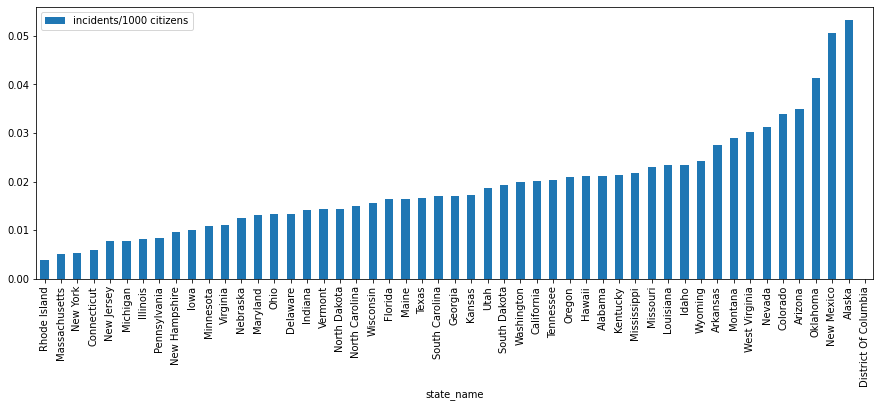

In [49]:
shootings_per_state.sort_values(by = 'incidents/1000 citizens').plot.bar(x='state_name', y='incidents/1000 citizens', figsize=(15,5))

Conclusions: Analysis of fatal shootings during police interventions shows that many factors may influence this phenomenon. Looking at the distribution by state, it is clear that in some states there are more incidents than in the others. Alaska, New Mexico and Oklahoma are the states with highest incidents rate per 1000 citizens. On the other hand, in Rhode Island the incidents rate is lowest and equals 0.0038 incidents/1000 citizens. 